# Exploratory Data Analysis Project Group 8

### Library Importation

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Import and Clean

This section's goal is to import different data sheet and clean them to make them meet our expectation of data and be ready for merging.

mbti data sheet

In [2]:
# MBTI data import
df_mbti = pd.read_csv("./data/raw/mbti.csv")

# Drop unrelated comlumns "stat", "enneagram", "img_url"
df_mbti = df_mbti.drop(["stat","enneagram","img_url"],axis = 1)

# Drop duplicated rows
df_mbti = df_mbti.drop_duplicates()

# Check if there is any NaN value or abnormal values in mbti columns 
print(df_mbti["mbti"].unique())
print(df_mbti["mbti"].isna().any())

# Drop the rows are "XXXX" (which is not a mbti type)
df_mbti = df_mbti[df_mbti["mbti"]!= "XXXX"]

# Make sure first letters are capitalized in "role" and "movie" columns
df_mbti["role"] = df_mbti["role"].str.title()
df_mbti["movie"] = df_mbti["movie"].str.title()

# Use str.strip() to remove spaces.
df_mbti["movie"] = df_mbti["movie"].str.strip()

# Regular expression pattern for extracting year: '(.*) \((\d{4})\)'
pattern_year = r'(.*) \((\d{4})\)'

# Extract movies with year
# Save the year into "release_year" columns
df_mbti[['movie_clean', 'release_year']] = df_mbti['movie'].str.extract(pattern_year)

# Regular expression pattern to match content in parentheses
pattern_parentheses = r'\s*\([^)]*\)'

# Remove content in parentheses
# Save movie names without parentheses into "movie_clean" columns
df_mbti['movie_clean'] = df_mbti['movie'].str.replace(pattern_parentheses, '', regex=True)

# Convert "release_year" column to datetime
df_mbti['release_year'] = pd.to_datetime(df_mbti['release_year'], format = '%Y').dt.year

# Drop "movie_name" column
df_mbti.drop("movie",axis=1, inplace=True)

# Rename columns to have consistency in all data sheets
df_mbti.rename(columns={'role': 'character','movie_clean':'movie_name'}, inplace=True)

df_mbti.to_csv("./data/cleaned/df_mbti.csv")

df_mbti.info()

['ESFP' 'XXXX' 'ESFJ' 'ESTP' 'ESTJ' 'ENFP' 'ENFJ' 'ENTP' 'ENTJ' 'ISFP'
 'ISFJ' 'ISTP' 'ISTJ' 'INFP' 'INFJ' 'INTP' 'INTJ']
False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16727 entries, 0 to 18740
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mbti          16727 non-null  object 
 1   character     16727 non-null  object 
 2   movie_name    16727 non-null  object 
 3   release_year  10939 non-null  float64
dtypes: float64(1), object(3)
memory usage: 653.4+ KB


In [3]:
df_mbti.sample(10)

,mbti,character,movie_name,release_year
16399,INFJ,"June Moone ""Enchantress""",Dc Extended Universe,NaN
4595,ESTJ,Aunt Em,The Wizard Of Oz,1939.0
16100,INFP,Sarah Greenbaum,An American Pickle,NaN
5322,ESTJ,Major Mint,Barbie As The Nutcracker,2001.0
13060,ISTP,Erik Heller,Hanna,2011.0
9889,ISFP,Shaun,Shaun Of The Dead,NaN
6053,ENFP,"Princess Victoria ""Tori""",Barbie : The Princess And The Popstar,NaN
11838,ISFJ,Linda Wheatley,Sling Blade,1996.0
16370,INFJ,Mal,Inception,2010.0
4506,ESTJ,Vector,Alita: Battle Angel,2019.0


imdb_movies

In [4]:
# imdb_movies data import
df_imdb_map = pd.read_csv("./data/raw/imdb_movies.csv")

# Drop unrelated comlumns "stat", "enneagram", "img_url"
df_imdb_map = df_imdb_map.drop(["overview","crew","orig_title","status","orig_lang"],axis = 1)

# Drop duplicated rows
df_imdb_map = df_imdb_map.drop_duplicates()

# Check if there is any NaN value in "names" columns 
print(df_imdb_map["names"].isna().any())

# Make sure first letters are capitalized in "names" and "genre" columns
df_imdb_map["names"] = df_imdb_map["names"].str.title()
df_imdb_map["genre"] = df_imdb_map["genre"].str.title()

# Strip whitespace
df_imdb_map['date_x'] = df_imdb_map['date_x'].str.strip()

# Convert "date_x" column to datetime
df_imdb_map['date_x'] = pd.to_datetime(df_imdb_map['date_x'], format='%m/%d/%Y')

# Create "release_year" column
df_imdb_map['release_year'] = df_imdb_map['date_x'].dt.year.astype('float')

# Rename columns to have consistency in all data sheets
df_imdb_map.rename(columns={'names': 'movie_name', 'date_x': 'release_date','budget_x':'budget'}, inplace=True)

df_imdb_map.to_csv("./data/cleaned/df_imdb_map.csv")

df_imdb_map.info()

False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10178 entries, 0 to 10177
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_name    10178 non-null  object        
 1   release_date  10178 non-null  datetime64[ns]
 2   score         10178 non-null  float64       
 3   genre         10093 non-null  object        
 4   budget        10178 non-null  float64       
 5   revenue       10178 non-null  float64       
 6   country       10178 non-null  object        
 7   release_year  10178 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 715.6+ KB


In [5]:
df_imdb_map.sample(10)

,movie_name,release_date,score,genre,budget,revenue,country,release_year
4282,Mowgli: Legend Of The Jungle,2018-12-07,65.0,"Adventure, Drama",175000000.0,20267371.6,GB,2018.0
8882,Hollywood Chainsaw Hookers,1988-03-01,58.0,"Comedy, Horror",23000.0,50285165.2,US,1988.0
8125,Critters 3,1991-12-11,51.0,"Comedy, Horror, Science Fiction",70800000.0,754008066.0,AU,1991.0
4162,Grudge,2021-10-08,62.0,"Thriller, Drama",75744000.0,298222862.4,TR,2021.0
3918,Her Blue Sky,2019-10-11,71.0,"Animation, Romance",29606012.8,4736031.0,JP,2019.0
4563,Samson And Delilah,1996-12-08,63.0,"Adventure, Drama, History",110000000.0,380285773.6,US,1996.0
967,American Sicario,2021-12-10,60.0,"Crime, Action",102600000.0,208453066.2,US,2021.0
5097,The Shallows,2016-08-18,64.0,"Horror, Drama, Thriller",13000000.0,118763442.0,AU,2016.0
5150,The Searchers,1956-05-26,78.0,Western,3750000.0,6216423.4,US,1956.0
3115,Star Trek: The Motion Picture,1979-12-21,65.0,"Science Fiction, Adventure, Mystery",35000000.0,139000000.0,AU,1979.0


imdb_db

In [6]:
#imdb_db data import
df_db = pd.read_csv("./data/raw/imdb_db.csv")

# Drop unrelated comlumns "Number of Votes","Time Duration (min)","Director","Actors","Restriction","Description","Serie Name","Serie Date"
df_db = df_db.drop(["Number of Votes","Time Duration (min)","Director","Actors","Restriction","Description","Serie Name","Serie Date"],axis = 1)

# Drop duplicated rows
df_db = df_db.drop_duplicates()

# Check if there is any NaN value in "Movie Name" columns 
print(df_db["Movie Name"].isna().any())

# Make sure first letters are capitalized in "Movie Name" and "Movie Type" columns
df_db["Movie Name"] = df_db["Movie Name"].str.title()
df_db["Movie Type"] = df_db["Movie Type"].str.title()

# Remove square brackets in "Movie Type" column
df_db['Movie Type'] = df_db['Movie Type'].str.replace(r'[\[\]]', '', regex=True)

# Remove single quotes in "Movie Type" column
df_db['Movie Type'] = df_db['Movie Type'].str.replace(r"'", '', regex=True)

# Rename columns to have consistency in all data sheets
df_db.rename(columns={'Movie Name': 'movie_name',
                            'Movie Date': 'release_year',
                            'Movie Type':'genre',
                            'Movie Revenue (M$)':'revenue',
                            'Score':'score',
                            'Metascore':'metascore'}, inplace=True)

df_db.to_csv("./data/cleaned/df_db.csv")
df_db.info()

False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 130482 entries, 0 to 189895
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   movie_name    130482 non-null  object 
 1   release_year  130477 non-null  float64
 2   genre         130482 non-null  object 
 3   revenue       9082 non-null    float64
 4   score         130482 non-null  float64
 5   metascore     8672 non-null    float64
dtypes: float64(4), object(2)
memory usage: 7.0+ MB


In [7]:
df_db.sample(10)

,movie_name,release_year,genre,revenue,score,metascore
115810,Zer,2017.0,Drama,NaN,6.9,NaN
46804,Humans,2015.0,"Drama, Sci-Fi",NaN,8.0,NaN
55152,School For Seduction,2004.0,"Drama, Comedy, Romance",NaN,5.1,NaN
23291,Chopped,2007.0,Reality-Tv,NaN,7.5,NaN
65019,The Mist,2017.0,"Drama, Horror, Sci-Fi",NaN,6.6,NaN
153627,Lao Shi · Hao,2019.0,Drama,NaN,6.1,NaN
35104,Breeders,1986.0,"Horror, Sci-Fi",NaN,3.7,NaN
187592,Joe D'Amato Totally Uncut,1999.0,"Documentary, Biography",NaN,7.3,NaN
147793,Around The World In 80 Treasures,2005.0,Documentary,NaN,7.9,NaN
11439,Le Doulos,1962.0,"Crime, Thriller",82772.0,7.8,NaN


In [8]:
#combined_dataset = pd.merge(df_imdb_map, df_db, on=['movie_name','release_year'], how='outer')
#combined_dataset.info()

### Merge df_db and df_mbti

In [9]:
# Split df_mbti into two datasets: one where release_year is not null and one where it is null
df_mbti_with_year = df_mbti[df_mbti['release_year'].notnull()]
df_mbti_no_year = df_mbti[df_mbti['release_year'].isnull()]

# Drop release_year for merge
df_mbti_no_year.drop('release_year', inplace=True, axis=1)

# Merge the datasets based only on 'movie_name' for those without a release year
merged_no_year = pd.merge(df_mbti_no_year, df_db, on='movie_name', how='inner')

# Drop abnormal rows (there are multiple matches from the imdb_db dataset which we don't know they are correct or not)
merged_no_year.drop_duplicates(subset=['movie_name','character'],keep = 'first',inplace=True)

# Merge the datasets based on 'movie_name_clean' and 'release_year' for those with a release year
merged_with_year = pd.merge(df_mbti_with_year, df_db, on=['movie_name', 'release_year'], how='inner')

# Drop abnormal rows (there are multiple matches from the imdb_db dataset which we don't know they are correct or not)
merged_with_year.drop_duplicates(subset=['movie_name','character','release_year'],keep = 'first',inplace=True)

# Combine the two merged datasets
final_merged_df = pd.concat([merged_with_year, merged_no_year])

# Display the first few rows of the final merged dataset
final_merged_df.sort_values(['movie_name','mbti']).to_csv("./data/cleaned/df_merged.csv")

/var/folders/0n/qqmnpgh93cd_z3ptl2h4znxw0000gn/T/ipykernel_16895/1679384642.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mbti_no_year.drop('release_year', inplace=True, axis=1)


In [10]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2811 entries, 0 to 2646
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mbti          2811 non-null   object 
 1   character     2811 non-null   object 
 2   movie_name    2811 non-null   object 
 3   release_year  2811 non-null   float64
 4   genre         2811 non-null   object 
 5   revenue       384 non-null    float64
 6   score         2811 non-null   float64
 7   metascore     483 non-null    float64
dtypes: float64(4), object(4)
memory usage: 197.6+ KB


In [11]:
final_merged_df.sample(10)

,mbti,character,movie_name,release_year,genre,revenue,score,metascore
732,ISTP,Demetri,Twilight,2005.0,Short,NaN,4.8,NaN
2329,ENFJ,Rose Da Silva,Silent Hill,1999.0,"Drama, Horror, Mystery",NaN,9.1,NaN
164,ESTJ,Joyce Stewart,Megan Is Missing,2011.0,"Drama, Horror, Thriller",NaN,4.7,NaN
1960,ESTJ,Chief Quimby,Inspector Gadget,2015.0,"Animation, Action, Adventure",NaN,4.4,NaN
1519,ENFP,Anne'S Mom,Lol,2008.0,"Comedy, Romance",NaN,6.3,NaN
1633,ISFP,Karen,Cabin Fever,2016.0,"Horror, Sci-Fi, Thriller",NaN,3.7,14.0
1439,ISTP,Aj Anderson,Adventures In Babysitting,1989.0,"Comedy, Short",NaN,6.3,NaN
952,ENFP,Prince Carlos,Barbie Mariposa,2008.0,"Animation, Family, Fantasy",NaN,6.0,NaN
141,ENTP,Mia Wallace,Pulp Fiction,1994.0,"Crime, Drama",107928762.0,8.9,94.0
980,ISFP,Cowboy,The Boys In The Band,2020.0,Drama,NaN,6.8,70.0


In [12]:
final_merged_df.head()

,mbti,character,movie_name,release_year,genre,revenue,score,metascore
0,ESFP,Jack Dawson,Titanic,1997.0,"Drama, Romance",659325379.0,7.8,75.0
1,ESTP,Brock Lovett,Titanic,1997.0,"Drama, Romance",659325379.0,7.8,75.0
2,ESTP,Fifth Officer Harold Lowe,Titanic,1997.0,"Drama, Romance",659325379.0,7.8,75.0
3,ESTJ,"Caledon ""Cal"" Hockley",Titanic,1997.0,"Drama, Romance",659325379.0,7.8,75.0
4,ESTJ,Bruce Ismay,Titanic,1997.0,"Drama, Romance",659325379.0,7.8,75.0


In [14]:
# Converting the final dataset into csv file
final_merged_df.to_csv("final_merged_dataset.csv", index = False)


## Time-series Visualizations
Since the data is categorical majorly, we decided to use stacked area plot, bar plot and line plot for easy understanding of the data.

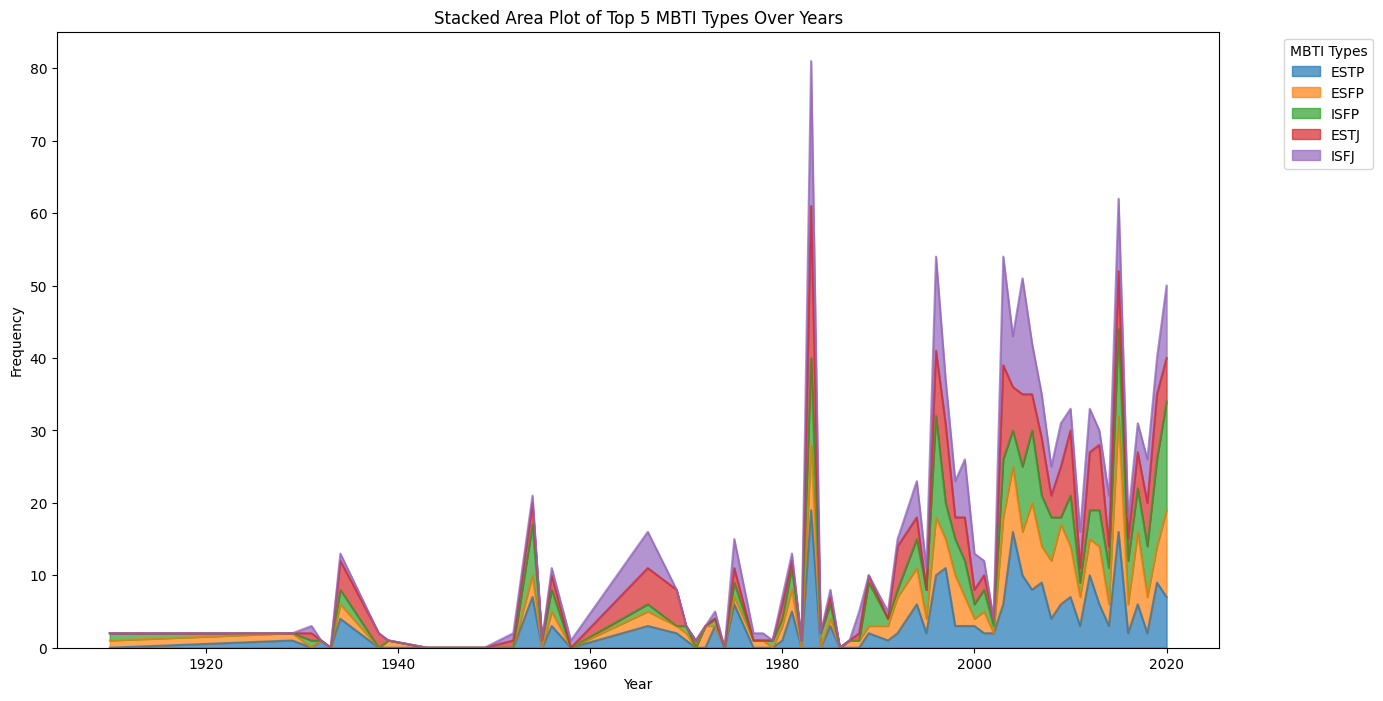

In [25]:
# Frequency of each MBTI type over the years
# Grouping data by release year and MBTI type and counting the occurrences
mbti_over_time = final_merged_df.groupby(['release_year', 'mbti']).size().unstack(fill_value=0)

# Selecting the top 5 most common MBTI types for the plot
top_mbti_types = mbti_over_time.sum().sort_values(ascending=False).head(5).index
mbti_simplified = mbti_over_time[top_mbti_types]

# Creating the stacked area plot
fig, ax = plt.subplots(figsize=(15, 8))
mbti_simplified.plot(kind='area', stacked=True, ax=ax, alpha=0.7)
ax.set_title('Stacked Area Plot of Top 5 MBTI Types Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Frequency')
ax.legend(title='MBTI Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



Or this one for "Frequency of each MBTI type over the years" 

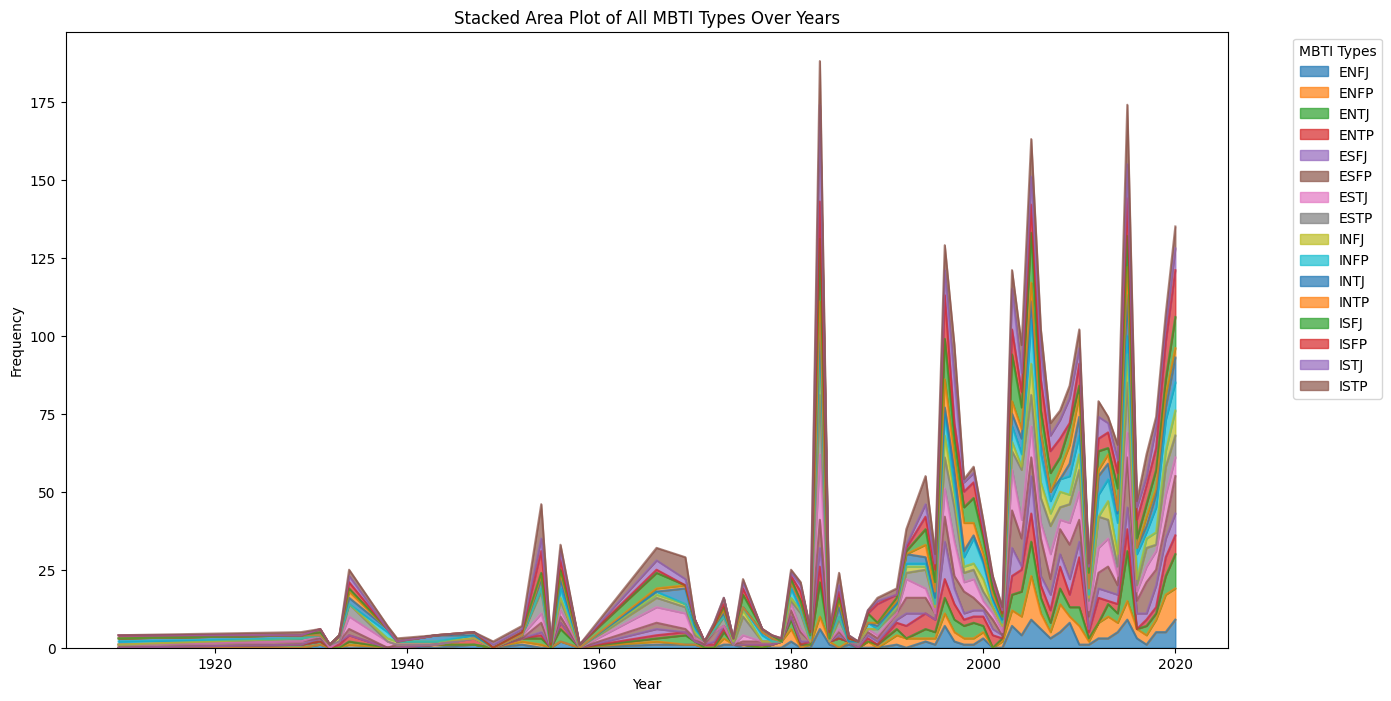

In [27]:
# Grouping data by release year and MBTI type and counting the occurrences
mbti_over_time_all = final_merged_df.groupby(['release_year', 'mbti']).size().unstack(fill_value=0)

# Creating the stacked area plot for all MBTI types
fig, ax = plt.subplots(figsize=(15, 8))
mbti_over_time_all.plot(kind='area', stacked=True, ax=ax, alpha=0.7)
ax.set_title('Stacked Area Plot of All MBTI Types Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Frequency')
ax.legend(title='MBTI Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


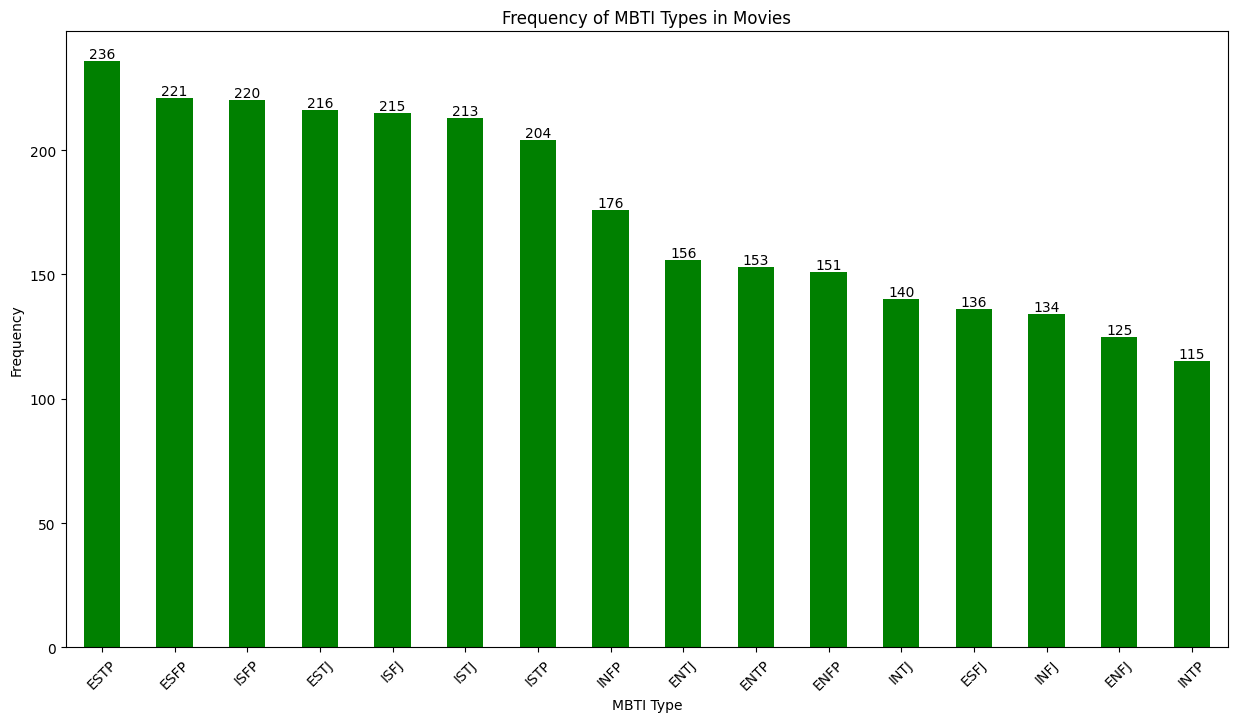

In [35]:
# Most frequently used MBTI character type
mbti_counts = final_merged_df['mbti'].value_counts()

# Creating the bar plot
fig, ax = plt.subplots(figsize=(15, 8))
mbti_counts.plot(kind='bar', color='green', ax=ax)
ax.set_title('Frequency of MBTI Types in Movies')
ax.set_xlabel('MBTI Type')
ax.set_ylabel('Frequency')
ax.bar_label(ax.containers[0])

plt.xticks(rotation=45)
plt.show()


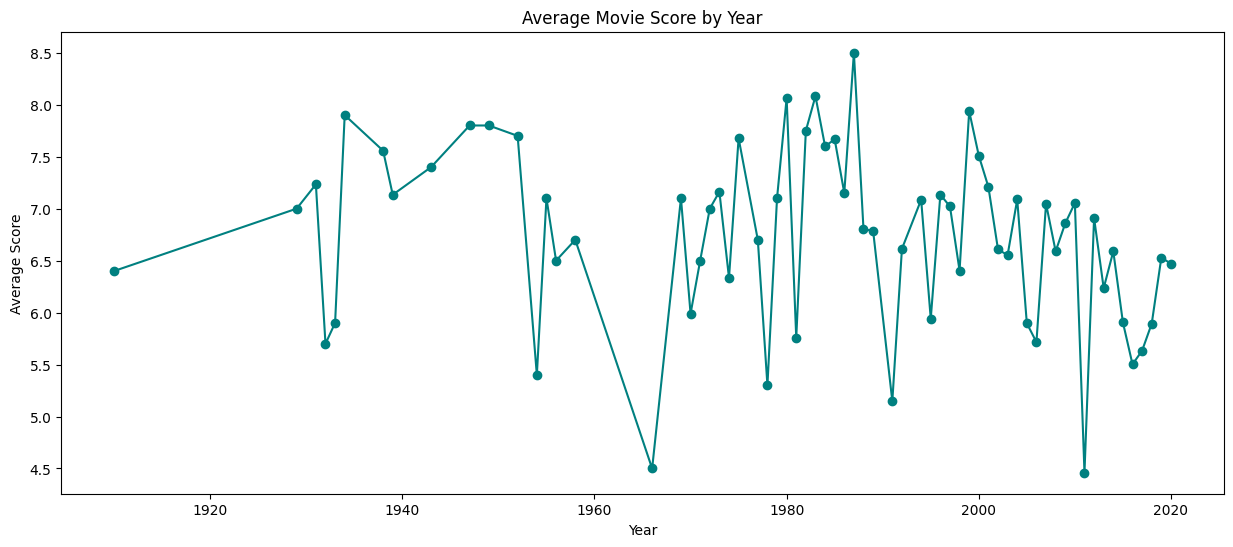

In [34]:
# Average Movie Score by Year
# Calculating the average movie score by year
average_score_by_year = final_merged_df.groupby('release_year')['score'].mean()

# Creating the plot
fig, ax = plt.subplots(figsize=(15, 6))
average_score_by_year.plot(kind='line', color='teal', marker='o', ax=ax)
ax.set_title('Average Movie Score by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Average Score')

plt.show()
